<img src='otus.png'>

# Нейронные сети

###Сравнение фреймворков
https://ru.wikipedia.org/wiki/%D0%A1%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BF%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC_%D0%B3%D0%BB%D1%83%D0%B1%D0%B8%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F

 Keras — это высокоуровневая библиотека для быстрой реализации Deep Learning алгоритмов, которая отлично подходит для знакомства аналитиков с областью. На данный момент Keras поддерживает 2 back-end-а, TensorFlow и Theano и в будущем будет получать официальную поддержку от TensorFlow. Более того, в пользу Keras говорит тот факт, что библиотека, по словам ее автора, продолжит выступать в качестве пользовательского интерфейса, который может быть использован с несколькими back-end-ами.
 https://habrahabr.ru/company/newprolab/blog/325818/

![alt text](https://habrastorage.org/files/5b0/776/de1/5b0776de1b564e37bf00b4af09c3774f.png)

## Перцептрон

Рассмотрим задачу бинарной классификации. Все объекты в тренировочной выборке отмечены $1$ и $0$  

Каждый вход - вектор вещественных чисел $\boldsymbol{x} = (1, x_1, x_2, ..., x_d) \in \mathbb{R}^d$.  
Каждый вход отмечен известной меткой - выходом $y(\boldsymbol{x})= {0, 1}$

Будем искать такие веса $w_0, w_1, ..., w_d \in \mathbb{R}^d$, чтобы минимизировать перекрестную энтропию:

$$E(\boldsymbol{w}) = - \frac{1}{N}\sum_{i=1}^{N}(y_i log \sigma(\boldsymbol{w}^T \boldsymbol{x}_i) + (1 - y_i)log (1 - \sigma(\boldsymbol{w}^T\boldsymbol{x}_i))),$$

где $\sigma(x) = \frac{1}{1 + e ^{-x}}$ - функция активации. 


Оптимизируем градиентным спуском.


Один перцептрон - это разновидность линейной регресии. Разные нелинейности на выходе нейрона можно рассматривать как разные формы функции ошибки.



<img src='neuron.png'>


Линейная комбинация входов, потом нелинейность
$$y = h(\boldsymbol{w}^T\boldsymbol{x})= h(\sum_{i}w_i x_i)$$


## Основные операции в tf

Суть такова:
 строим граф вычислений
 
### Создание переменной в tf:
  tf.Variable(value, name="")

In [1]:
import tensorflow as tf

x = tf.Variable(3, name="x")
y = tf.Variable(4, name="y")


Арифметические операции такие же как и обычно

In [2]:
f = x*x*y + y + 2

В отличие от того, к чему мы привыкли этот код ничего пока не считает. Мы пока только проинициализировали граф. Осталось только проинициализировать сессию, переменные и запустить выполнение!


In [3]:
sess = tf.Session() 
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)

print(result)

sess.close()

42


Можно и по-другому. Вместо конкретной сессии мы инициализируем InteractiveSession, которая автоматически считается сессией по-умолчанию.

Также стоит отметить то, как мы вычисляем значение f: f.eval. Мы взяли конкретный узел f и вызвали его вычисление.

In [8]:
sess = tf.InteractiveSession() 
sess.run(x.initializer)
sess.run(y.initializer)
result = f.eval()
print(result)
sess.close()

42


### Жизненный цикл переменных
Как только мы вызвали f.eval tensorflow автоматически определил от каких переменных зависит результат и выполняет eval для них.

Значения узлов не переиспользуются и не сохраняются при перезапусках графа.

Сохраняются только значения переменных Variable.

### Линейная регрессия - данные

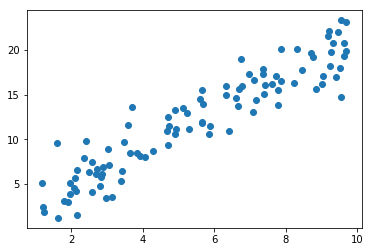

In [4]:
import numpy as np
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt


true_slope, true_bias = 2., 1.
n_samples = 100

X_data = np.random.uniform(1, 10, (n_samples, 1))
y_data = true_slope * X_data + true_bias + np.random.normal(0, 2, (n_samples, 1))

fig, ax = plt.subplots()
ax.scatter(X_data, y_data)
plt.show()

### Линейная регрессия - аналитическое решение

In [5]:
import numpy as np


X_data_plus_bias = np.c_[np.ones((X_data.shape[0], 1)), X_data]

X = tf.constant(X_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(y_data.reshape(-1, 1), dtype=tf.float32, name="y")

XT = tf.transpose(X)

theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)

with tf.Session() as sess:
    theta_value = theta.eval()
    print(theta_value)

[[0.9895202]
 [2.027728 ]]


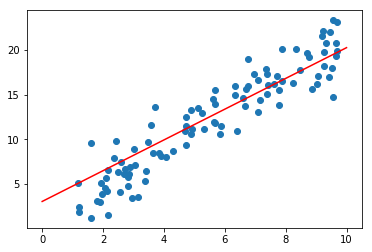

In [6]:
line_points = np.array([[1, 0], [1, 10]])
line_values = theta_value.T.dot(line_points)

fig, ax = plt.subplots()
ax.scatter(X_data, y_data)
ax.plot([0, 10], line_values[0], color='red')
plt.show()

### Линейная регрессия - численное решение

In [7]:
X = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

k = tf.Variable(np.random.randn(), name="slope")
b = tf.Variable(np.random.randn(), name="bias")

y_pred = tf.multiply(X, k) + b
loss = tf.reduce_sum(tf.pow(y - y_pred, 2)) / n_samples

In [8]:
batch_size, num_steps, learning_rate, display_step = 10, 10000, .05, 1000

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    for i in range(num_steps):
        indices = np.random.choice(n_samples, batch_size)
        
        X_batch, y_batch = X_data[indices], y_data[indices]
        
        sess.run(optimizer, feed_dict = {X: X_batch, y: y_batch})
        
        if (i+1) % display_step == 0:
            loss_val, k_val, b_val = sess.run([loss, k, b], feed_dict = {X: X_data, y: y_data})
            print("Epoch %d: %.8f, k=%.4f, b=%.4f" % (i+1, loss_val, k_val, b_val))

Epoch 1000: 4.19136047, k=2.0358, b=1.0010
Epoch 2000: 4.93155527, k=1.9022, b=0.8879
Epoch 3000: 4.74239540, k=1.9091, b=0.9700
Epoch 4000: 4.19224644, k=2.0102, b=1.0379
Epoch 5000: 4.19013739, k=2.0340, b=1.0007
Epoch 6000: 4.18981457, k=2.0327, b=1.0053
Epoch 7000: 4.23578072, k=2.0006, b=0.9327
Epoch 8000: 4.32882690, k=2.0796, b=1.0521
Epoch 9000: 4.18902159, k=2.0145, b=1.0679
Epoch 10000: 4.23773813, k=1.9886, b=1.0075


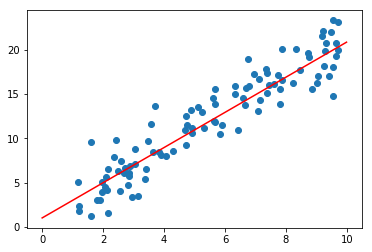

In [9]:
fig, ax = plt.subplots()
ax.scatter(X_data, y_data)
ax.plot(np.arange(0, 10, 0.01), k_val * np.arange(0, 10, 0.01) + b_val, color='red')
plt.show()

## Логистическая регрессия - данные

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from pandas.tools.plotting import table
from sklearn import datasets
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 8]

np.random.seed(42)


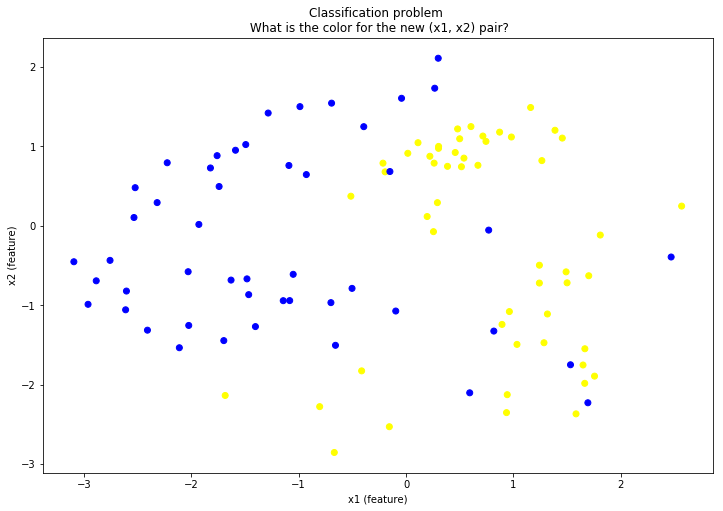

((130, 2), (130,))


In [11]:
X, y = datasets.make_classification(n_features=2, n_informative=2, n_redundant=0, n_repeated=0, random_state=12, n_samples=130)
X_data_plus_bias = np.c_[np.ones((X.shape[0], 1)), X]
X_train, X_test, y_train, y_test = train_test_split(X_data_plus_bias, y, test_size=30, random_state=42)

colors = ['yellow' if y_i else 'blue' for y_i in y_train]
plt.scatter(X_train[:, 1], X_train[:, 2], c=colors)
plt.title("Classification problem \n What is the color for the new (x1, x2) pair?")
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.show()

print(X.shape, y.shape)

## Логистическая регрессия в tf

In [13]:
# Parameters
learning_rate = 0.1
num_steps = 500
batch_size = 10
display_step = 100

# Network Parameters
n_hidden_1 = 20 # 1st layer number of neurons
n_hidden_2 = 20 # 2nd layer number of neurons
num_input = 2
num_classes = 2 

# tf Graph input
X_p = tf.placeholder("float", [None, num_input], name='X_p')
Y_p = tf.placeholder("float", [None, num_classes], name='Y_p')

In [14]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

In [15]:

# Create model
def neural_net(x):
    # Hidden fully connected layer
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer
  
  
# Construct model
logits = neural_net(X_p)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y_p))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y_p, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



Step 1, Minibatch Loss= 2.6283, Training Accuracy= 0.900
Step 100, Minibatch Loss= 1.2997, Training Accuracy= 0.700
Step 200, Minibatch Loss= 0.6078, Training Accuracy= 0.600
Step 300, Minibatch Loss= 0.4888, Training Accuracy= 0.700
Step 400, Minibatch Loss= 0.7043, Training Accuracy= 0.800
Step 500, Minibatch Loss= 0.7915, Training Accuracy= 0.700
Optimization Finished!
('Testing Accuracy:', 1.0)


/usr/local/lib/python2.7/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'ls'
  s)


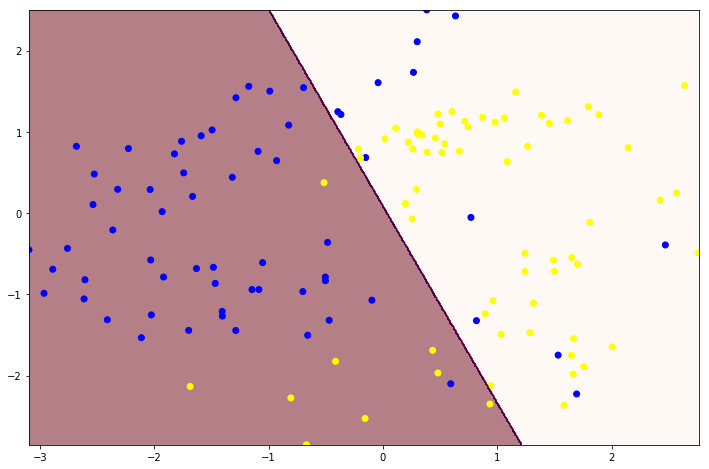

In [16]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, num_steps+1):
        indices = np.random.choice(130, batch_size)
        batch_x, batch_y = X[indices], y[indices]
        
        batch_y = np.c_[batch_y, 1 - batch_y]

        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X_p: batch_x, Y_p: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X_p: batch_x,
                                                                 Y_p: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

    print("Optimization Finished!")

    # Calculate accuracy for data
    indices = np.random.choice(130, batch_size)
    batch_x, batch_y = X[indices], y[indices]
    batch_y = np.c_[batch_y, 1 - batch_y]
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X_p: batch_x,
                                      Y_p: batch_y}))
    
    num_levels = 50
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    
    x_grid, y_grid = np.mgrid[x_min:x_max:.01, y_min:y_max:.01]
    pos = np.empty(x_grid.shape + (2,))
    pos[:, :, 0] = x_grid
    pos[:, :, 1] = y_grid
    pos_lin = pos.reshape(pos.shape[0] * pos.shape[1], 2)
    
    prediction = tf.argmax(logits, 1)
    pred_lin = sess.run([prediction], feed_dict={X_p: pos_lin})
    pred = pred_lin[0].reshape(pos.shape[0], pos.shape[1])

    fig, ax = plt.subplots()
    ax.set_xlim((x_min, x_max))
    ax.set_ylim((y_min, y_max))
    ax.contourf(x_grid, y_grid, pred, num_levels, cmap='Reds', alpha=0.5, ls=None)
    ax.contour(x_grid, y_grid, pred, levels=[0.5])

    colors = ['yellow' if y_i else 'blue' for y_i in y]
    plt.scatter(X[:, 0], X[:, 1], c=colors)
    plt.show()

## Логистическая регрессия в keras

In [56]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [17]:
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from keras.models import Sequential
from keras.layers import Input, Dense, Activation

Using TensorFlow backend.


In [18]:
logr = Sequential()
logr.add(Dense(1, input_dim=3, activation='sigmoid'))
logr.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [19]:
logr.fit(X_train, y_train, batch_size=16, nb_epoch=100, verbose=1, validation_data=(X_test, y_test))

/usr/local/lib/python2.7/dist-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 100 samples, validate on 30 samples
Epoch 1/100
100/100 [==============================] - 0s 2ms/step - loss: 1.4233 - acc: 0.1600 - val_loss: 1.5778 - val_acc: 0.1333
Epoch 2/100
100/100 [==============================] - 0s 197us/step - loss: 1.3715 - acc: 0.1600 - val_loss: 1.5208 - val_acc: 0.1333
Epoch 3/100
100/100 [==============================] - 0s 156us/step - loss: 1.3273 - acc: 0.1700 - val_loss: 1.4611 - val_acc: 0.1333
Epoch 4/100
100/100 [==============================] - 0s 366us/step - loss: 1.2820 - acc: 0.1800 - val_loss: 1.4047 - val_acc: 0.1667
Epoch 5/100
100/100 [==============================] - 0s 201us/step - loss: 1.2400 - acc: 0.1800 - val_loss: 1.3531 - val_acc: 0.1667
Epoch 6/100
100/100 [==============================] - 0s 229us/step - loss: 1.2004 - acc: 0.1900 - val_loss: 1.3011 - val_acc: 0.1667
Epoch 7/100
100/100 [==============================] - 0s 219us/step - loss: 1.1601 - acc: 0.2000 - val_loss: 1.2526 - val_acc: 0.1667
Epoch 8/100


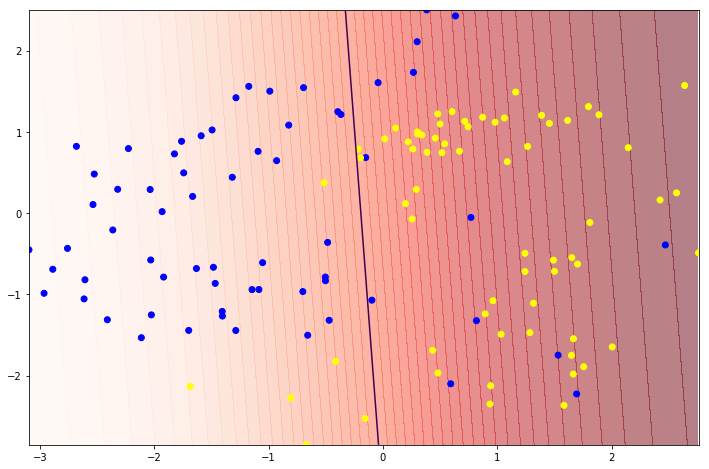

In [20]:
num_levels = 50
    

def plot_model_results(decision, X, Y):
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    
    x, y = np.mgrid[x_min:x_max:.01, y_min:y_max:.01]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x
    pos[:, :, 1] = y
    pos_lin = pos.reshape(pos.shape[0] * pos.shape[1], 2)
    pred_lin = decision(np.c_[np.ones((pos_lin.shape[0], 1)), pos_lin])
    pred = pred_lin.reshape(pos.shape[0], pos.shape[1])

    fig, ax = plt.subplots()
    ax.set_xlim((x_min, x_max))
    ax.set_ylim((y_min, y_max))
    ax.contourf(x, y, pred, num_levels, cmap='Reds', alpha=0.5, ls=None)
    ax.contour(x, y, pred, levels=[0.5])

    colors = ['yellow' if y_i else 'blue' for y_i in Y]
    plt.scatter(X[:, 0], X[:, 1], c=colors)
    plt.show()
    
    
plot_model_results(logr.predict, X, y)

Добавим слои

<img src='neuron.png'>

<img src='https://camo.githubusercontent.com/269f47b8185a2ca349ead57db511250553fd918b/687474703a2f2f63733233316e2e6769746875622e696f2f6173736574732f6e6e312f6e657572616c5f6e6574322e6a706567'>

In [21]:
nn = Sequential()
nn.add(Dense(20, input_dim=3, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))
nn.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
nn.fit(X_train, y_train, batch_size=16, nb_epoch=100, verbose=1, validation_data=(X_test, y_test))
print(np.sum(np.round(nn.predict(X_test).flatten() ) == y_test) / y_test.shape[0])

Train on 100 samples, validate on 30 samples
Epoch 1/100
100/100 [==============================] - 0s 2ms/step - loss: 0.8250 - acc: 0.2200 - val_loss: 0.8353 - val_acc: 0.3333
Epoch 2/100
100/100 [==============================] - 0s 272us/step - loss: 0.7968 - acc: 0.2900 - val_loss: 0.8053 - val_acc: 0.3667
Epoch 3/100
100/100 [==============================] - 0s 474us/step - loss: 0.7726 - acc: 0.3300 - val_loss: 0.7737 - val_acc: 0.4667
Epoch 4/100
100/100 [==============================] - 0s 161us/step - loss: 0.7476 - acc: 0.4500 - val_loss: 0.7445 - val_acc: 0.5333
Epoch 5/100
100/100 [==============================] - 0s 125us/step - loss: 0.7249 - acc: 0.4800 - val_loss: 0.7205 - val_acc: 0.5333
Epoch 6/100
100/100 [==============================] - 0s 204us/step - loss: 0.7060 - acc: 0.4800 - val_loss: 0.7007 - val_acc: 0.5333
Epoch 7/100
100/100 [==============================] - 0s 122us/step - loss: 0.6891 - acc: 0.4800 - val_loss: 0.6809 - val_acc: 0.5333
Epoch 8/100


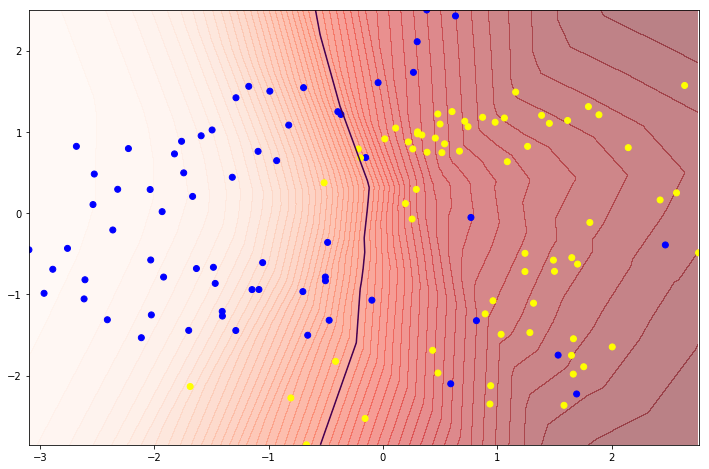

In [22]:
plot_model_results(nn.predict, X, y)

Train on 100 samples, validate on 30 samples
Epoch 1/100
100/100 [==============================] - 0s 5ms/step - loss: 0.7044 - acc: 0.3400 - val_loss: 0.7221 - val_acc: 0.4000
Epoch 2/100
100/100 [==============================] - 0s 245us/step - loss: 0.7002 - acc: 0.4100 - val_loss: 0.7170 - val_acc: 0.4667
Epoch 3/100
100/100 [==============================] - 0s 320us/step - loss: 0.6963 - acc: 0.4800 - val_loss: 0.7123 - val_acc: 0.4667
Epoch 4/100
100/100 [==============================] - 0s 261us/step - loss: 0.6926 - acc: 0.5800 - val_loss: 0.7073 - val_acc: 0.5333
Epoch 5/100
100/100 [==============================] - 0s 251us/step - loss: 0.6889 - acc: 0.6300 - val_loss: 0.7027 - val_acc: 0.5667
Epoch 6/100
100/100 [==============================] - 0s 263us/step - loss: 0.6854 - acc: 0.6300 - val_loss: 0.6982 - val_acc: 0.5667
Epoch 7/100
100/100 [==============================] - 0s 275us/step - loss: 0.6821 - acc: 0.6700 - val_loss: 0.6934 - val_acc: 0.6000
Epoch 8/100


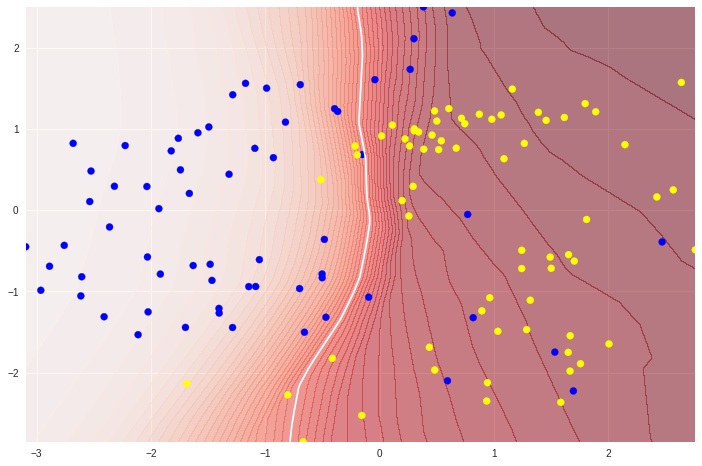

In [93]:
nn = Sequential()
nn.add(Dense(20, input_dim=3, activation='relu'))
nn.add(Dense(20, activation='relu'))
nn.add(Dense(20, activation='relu'))
nn.add(Dense(20, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))
nn.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
nn.fit(X_train, y_train, batch_size=16, nb_epoch=100, verbose=1, validation_data=(X_test, y_test))
print(np.sum(np.round(nn.predict(X_test).flatten() ) == y_test) / y_test.shape[0])
plot_model_results(nn.predict, X, y)

## Обучение нейронной сети, алгоритм обратного распространения ошибки

### Граф вычислений и дифференцирование

Рассмотрим функцию $$x^2 + xy + (x + y)^2$$

Ее можно представить в виде графа несколькими способами (как композицию простых функций):

<img src='graph.png'>

Дифференцирование. Пользуемся правилом дифференцирования сложной функции.

$$(f\circ g)\prime(x) = (f(g(x)))\prime = f\prime(g(x))g\prime(x)$$

Если дифференцируем по векторам - получаем градиент, а если по матрице - получаем матрицу Якоби.

<img src='g1.png'>

Forward propagation (прямое распространение). Вычисляем $\frac{\delta f}{\delta x} $ как сложную функцию

<img src='g2.png'>

Back propagation (обратное распространение). Начинаем от конца и идем как  $\frac{\delta f}{\delta g} = \sum_{g \prime \in Children(g)} \frac{\delta f}{\delta g \prime} \frac{\delta g \prime}{\delta g } $ 

<img src='g3.png'>

Разбор примера см в [1]


## Виды оптимизаторов

## Функции активации

<img src='act.png'>

Логистический сигмоид

$$ \frac{1}{1 + e^{-x}}$$

Гиперболический тангенс tanh

$$\frac{e^x-e^{-x}}{e^x+e^{-x}}$$

Ступенька (функция Хевисайда)

$$\begin{cases}
    0, & x < 0\\
    1, & x \geq 0.
  \end{cases}$$
  
ReLU
$$\begin{cases}
    0, & x < 0\\
    x, & x \geq 0.
  \end{cases}$$


## Проблема xor

https://aimatters.wordpress.com/2016/01/16/solving-xor-with-a-neural-network-in-tensorflow/
![alt text](http://web.science.mq.edu.au/~cassidy/comp449/html/xor.gif)

In [26]:
x_ = tf.placeholder(tf.float32, shape=[4,2], name="x-input")
y_ = tf.placeholder(tf.float32, shape=[4,1], name="y-input")

Theta1 = tf.Variable(tf.random_uniform([2,2], -1, 1), name="Theta1")
Theta2 = tf.Variable(tf.random_uniform([2,1], -1, 1), name="Theta2")

Bias1 = tf.Variable(tf.zeros([2]), name="Bias1")
Bias2 = tf.Variable(tf.zeros([1]), name="Bias2")

A2 = tf.sigmoid(tf.matmul(x_, Theta1) + Bias1)
Hypothesis = tf.sigmoid(tf.matmul(A2, Theta2) + Bias2)

cost = tf.reduce_mean(( (y_ * tf.log(Hypothesis)) + 
        ((1 - y_) * tf.log(1.0 - Hypothesis)) ) * -1)
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

XOR_X = [[0,0],[0,1],[1,0],[1,1]]
XOR_Y = [[0],[1],[1],[0]]

init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

for i in range(100000):
    sess.run(train_step, feed_dict={x_: XOR_X, y_: XOR_Y})

    if i % 10000 == 0:
        print('---------------------')
        print('Epoch ', i)
        print('Hypothesis ', sess.run(Hypothesis, feed_dict={x_: XOR_X, y_: XOR_Y}))
        print('Theta1 ', sess.run(Theta1))
        print('Bias1 ', sess.run(Bias1))
        print('Theta2 ', sess.run(Theta2))
        print('Bias2 ', sess.run(Bias2))
        print('cost ', sess.run(cost, feed_dict={x_: XOR_X, y_: XOR_Y}))

---------------------
('Epoch ', 0)
('Hypothesis ', array([[0.5191291 ],
       [0.4876    ],
       [0.5161269 ],
       [0.48470998]], dtype=float32))
('Theta1 ', array([[ 0.07809   ,  0.01713243],
       [ 0.3221843 , -0.24336076]], dtype=float32))
('Bias1 ', array([ 1.2945384e-06, -5.5374576e-06], dtype=float32))
('Theta2 ', array([[-0.832575  ],
       [ 0.98572373]], dtype=float32))
('Bias2 ', array([-1.8974319e-05], dtype=float32))
('cost ', 0.6937111)
---------------------
('Epoch ', 10000)
('Hypothesis ', array([[0.5081129 ],
       [0.49148932],
       [0.50884324],
       [0.49222583]], dtype=float32))
('Theta1 ', array([[ 0.02570375,  0.0344021 ],
       [ 0.19320206, -0.1164963 ]], dtype=float32))
('Bias1 ', array([-0.00593142, -0.01619097], dtype=float32))
('Theta2 ', array([[-0.8101705 ],
       [ 0.94510496]], dtype=float32))
('Bias2 ', array([-0.03238859], dtype=float32))
('cost ', 0.69328874)
---------------------
('Epoch ', 20000)
('Hypothesis ', array([[0.50416154],

<img src='tf_graph.png'>

(200, 2)
(200, 1)


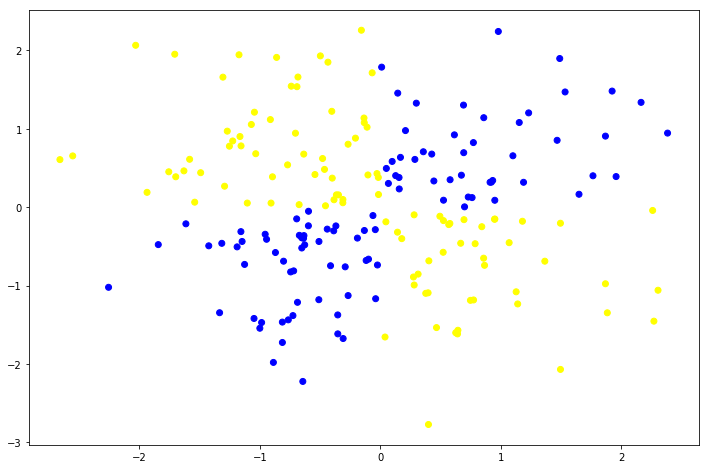

In [76]:
rng = np.random.RandomState(0)
XOR_X = rng.randn(200, 2)
print(XOR_X.shape)
XOR_Y = np.logical_xor(XOR_X[:, 0] > 0, XOR_X[:, 1] > 0).reshape(-1, 1)
print(XOR_Y.shape)

colors = ['yellow' if y_i else 'blue' for y_i in XOR_Y]
plt.scatter(XOR_X[:, 0], XOR_X[:, 1], c=colors)
plt.show()

## xor example

http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=3&seed=0.87137&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

## Пример на MNIST. Cвертки

<img src='conv.png'>

In [103]:
# Imports
import numpy as np
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.INFO)

# Our application logic will be added here

def cnn_model_fn(features, labels, mode):
  """Model function for CNN."""
  # Input Layer
  input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])

  # Convolutional Layer #1
  conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #1
  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

  # Convolutional Layer #2 and Pooling Layer #2
  conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)
  pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Convolutional Layer #2 and Pooling Layer #2
  conv3 = tf.layers.conv2d(
      inputs=pool2,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)
  pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2], strides=2)

  print(pool3.shape)

  # Dense Layer
  pool3_flat = tf.reshape(pool3, [-1, 3 * 3 * 64])
  dense = tf.layers.dense(inputs=pool3_flat, units=1024, activation=tf.nn.relu)
  dropout = tf.layers.dropout(
      inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

  # Logits Layer
  logits = tf.layers.dense(inputs=dropout, units=10)

  predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add softmax_tensor to the graph. It is used for PREDICT and by the
      # logging_hook.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }

  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

  # Calculate Loss (for both TRAIN and EVAL modes)
  onehot_labels = tf.one_hot(indices=tf.cast(labels, tf.int32), depth=10)
  loss = tf.losses.softmax_cross_entropy(
      onehot_labels=onehot_labels, logits=logits)

  # Configure the Training Op (for TRAIN mode)
  if mode == tf.estimator.ModeKeys.TRAIN:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optimizer.minimize(
        loss=loss,
        global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

  # Add evaluation metrics (for EVAL mode)
  eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])}
  return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

def main(unused_argv):
  # Load training and eval data
  mnist = tf.contrib.learn.datasets.load_dataset("mnist")
  train_data = mnist.train.images # Returns np.array
  train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
  eval_data = mnist.test.images # Returns np.array
  eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)
  # Create the Estimator
  mnist_classifier = tf.estimator.Estimator(
      model_fn=cnn_model_fn, model_dir="./mnist_convnet_model2")
  tensors_to_log = {"probabilities": "softmax_tensor"}
  logging_hook = tf.train.LoggingTensorHook(
      tensors=tensors_to_log, every_n_iter=50)

  # Train the model
  train_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": train_data},
      y=train_labels,
      batch_size=100,
      num_epochs=None,
      shuffle=True)
  mnist_classifier.train(
      input_fn=train_input_fn,
      steps=200,
      hooks=[logging_hook])
# Evaluate the model and print results
  eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": eval_data},
    y=eval_labels,
    num_epochs=1,
    shuffle=False)
  eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
  print(eval_results)

  
if __name__ == "__main__":
  tf.app.run()

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fded9c33cd0>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': './mnist_convnet_model2', '_save_summary_steps': 100}
(100, 3, 3, 64)
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from ./mnist_convnet_model2/model.ckpt-1
INFO:tensorflow:Saving checkpoints for 2 into ./mnist_convnet_model2/model.ckpt.
IN

SystemExit: ignored

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
!python2 conv.py

In [ ]:
!tensorboard -logdir mnist_convnet_model2

<img src='board.png'>

## Литература

1. Николенко, Кадурин, Архангельская. Глубокое обучение. Погружение в мир нейронных сетей.
2. Aurélien Géron Hands-on Machine Learning with Scikit-Learn and TensorFlow
3. Гудфеллоу, Бенджио, Курвилль. Глубокое обучение